In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Import File

In [2]:
vars_data = pd.read_csv('pd_input.vcf', sep = '\t') #ended up not using this

# Read Depth Distribution of Variant Genotypes

Read Depth = The number of times a particular base is represented within all the reads from sequencing. The higher the read depth,the more confidence scientists can have in identifying a base – known as 'base calling'

In [3]:
vars_data.loc[:,"FORMAT"]

0        GT:DP:RO:QR:AO:QA:GL
1        GT:DP:RO:QR:AO:QA:GL
2        GT:DP:RO:QR:AO:QA:GL
3        GT:DP:RO:QR:AO:QA:GL
4        GT:DP:RO:QR:AO:QA:GL
                 ...         
41649    GT:DP:RO:QR:AO:QA:GL
41650    GT:DP:RO:QR:AO:QA:GL
41651    GT:DP:RO:QR:AO:QA:GL
41652    GT:DP:RO:QR:AO:QA:GL
41653    GT:DP:RO:QR:AO:QA:GL
Name: FORMAT, Length: 41654, dtype: object

In [4]:
vars_data.loc[:,"INFO"][1]

'AB=0.16129;ABP=33.9012;AC=8;AF=0.4;AN=20;AO=10;CIGAR=1X1M1X;DP=120;DPB=122.333;DPRA=0.428571;EPP=24.725;EPPR=3.0103;GTI=4;LEN=1;MEANALT=1;MQM=53.8;MQMR=52.0727;NS=10;NUMALT=1;ODDS=1.96513;PAIRED=0;PAIREDR=0;PAO=0;PQA=0;PQR=199;PRO=7;QA=346;QR=3440;RO=110;RPL=0;RPP=24.725;RPPR=3.0103;RPR=10;RUN=1;SAF=10;SAP=24.725;SAR=0;SRF=110;SRP=241.872;SRR=0;TYPE=snp;ANN=A|upstream_gene_variant|MODIFIER|YAL067W-A|YAL067W-A|transcript|YAL067W-A_mRNA|protein_coding||c.-1510G>A|||||1510|,A|downstream_gene_variant|MODIFIER|YAL069W|YAL069W|transcript|YAL069W_mRNA|protein_coding||c.*321G>A|||||321|,A|downstream_gene_variant|MODIFIER|YAL068W-A|YAL068W-A|transcript|YAL068W-A_mRNA|protein_coding||c.*178G>A|||||178|,A|downstream_gene_variant|MODIFIER|PAU8|YAL068C|transcript|YAL068C_mRNA|protein_coding||c.*837C>T|||||837|,A|intergenic_region|MODIFIER|YAL068W-A-PAU8|YAL068W-A-YAL068C|intergenic_region|YAL068W-A-YAL068C|||n.970G>A||||||'

In [5]:
vars_data.loc[:,"INFO"]

0        AB=0.16129;ABP=33.9012;AC=8;AF=0.4;AN=20;AO=10...
1        AB=0.16129;ABP=33.9012;AC=8;AF=0.4;AN=20;AO=10...
2        AB=0.290323;ABP=14.8483;AC=8;AF=0.4;AN=20;AO=1...
3        AB=0.290323;ABP=14.8483;AC=8;AF=0.4;AN=20;AO=1...
4        AB=0.254237;ABP=33.963;AC=4;AF=0.2;AN=20;AO=16...
                               ...                        
41649    AB=0.5;ABP=3.0103;AC=10;AF=0.5;AN=20;AO=90;CIG...
41650    AB=0.35;ABP=65.5487;AC=11;AF=0.55;AN=20;AO=154...
41651    AB=0.454545;ABP=3.20771;AC=3;AF=0.15;AN=20;AO=...
41652    AB=0.494505;ABP=3.03416;AC=12;AF=0.666667;AN=1...
41653    AB=0;ABP=0;AC=0;AF=0;AN=14;AO=5;CIGAR=1X;DP=39...
Name: INFO, Length: 41654, dtype: object

In [6]:
vars_data.loc[:,"Sample9"]

0          0|0:10:10:352:0:0:0,-3.0103,-31.9591
1          0|0:10:10:352:0:0:0,-3.0103,-31.9591
2        0|0:12:10:333:2:62:0,-2.20805,-30.0757
3        0|0:12:10:333:2:62:0,-2.20805,-30.0757
4          0/0:10:10:317:0:0:0,-3.0103,-21.5483
                          ...                  
41649    0/1:10:5:160:5:140:-4.59845,0,-8.94366
41650    0/0:26:23:572:1:27:0,-4.74715,-42.7502
41651     0/1:2:1:35:1:35:-0.197211,0,-0.197211
41652                             .:.:.:.:.:.:.
41653                             .:.:.:.:.:.:.
Name: Sample9, Length: 41654, dtype: object

http://samtools.github.io/hts-specs/VCFv4.1.pdf

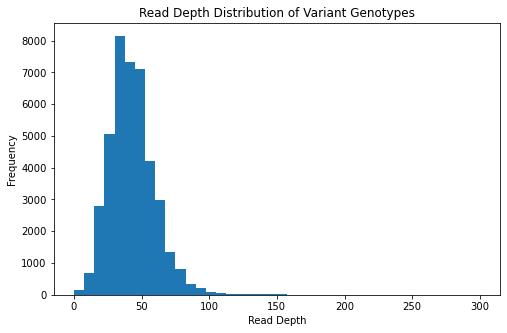

In [68]:
#DP = read depth 
Read_Depth=[]

for line in open("vars_annotate.vcf"):
    if line.startswith("#"):
        continue #skip headers
    try:
        Read_Depth.append(int(line.strip().split()[7].split(';')[7][3:])) #takes just read depth value
    except ValueError: #excludes values that are not single numbers
        pass
#generates read depth histogram
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(Read_Depth, bins = 40, range = (0,300)) #Stays 0 for a long time after 150 can cut range to see data
ax.set_title("Read Depth Distribution of Variant Genotypes")
ax.set_xlabel("Read Depth")
ax.set_ylabel("Frequency")

plt.show()

# Quality distribution of variant genotypes

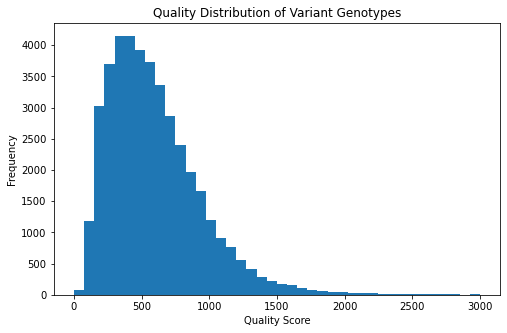

In [30]:
#GQ = quality 
Quality_Distribution=[]

for line in open("vars_annotate.vcf"):
    if line.startswith("#"):
        continue #skip headers
    try:
        Quality_Distribution.append(int(line.strip().split()[7].split(';')[26][3:])) #takes just GQ value
    except ValueError: #excludes values that are not single numbers
        pass
#generates read depth histogram
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(Quality_Distribution, bins = 40, range = (0,3000)) #each one has a GQ value keep entire range
ax.set_title("Quality Distribution of Variant Genotypes")
ax.set_xlabel("Quality Score")
ax.set_ylabel("Frequency")

plt.show()

# Allele Frequency Spectrum of Identified Variants

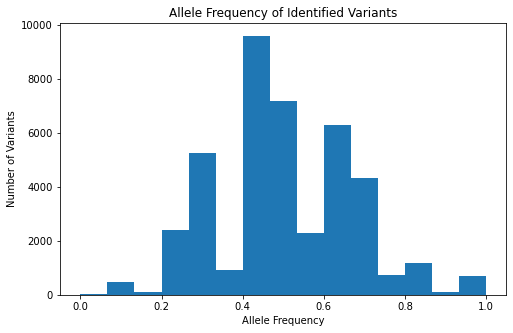

In [40]:
#AF = allele frequency 

Allele_Freq = []

for line in open("vars_annotate.vcf"):
    if line.startswith("#"):
        continue #skip headers
    try:
        Allele_Freq.append(float(line.strip().split()[7].split(';')[3][3:])) #takes just AF value use float to include decimal points
    except ValueError: #excludes values that are not single numbers
        pass
#generates read depth histogram
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(Allele_Freq, bins = 15, range = (0,1)) #allele frequency values are no greater than 1
ax.set_title("Allele Frequency of Identified Variants")
ax.set_xlabel("Allele Frequency")
ax.set_ylabel("Number of Variants")

plt.show()

# Predicted Effects

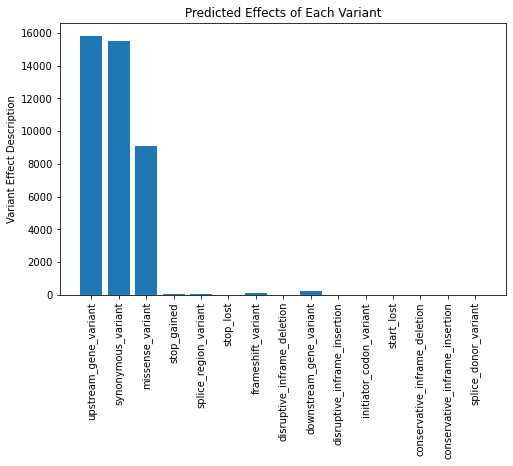

In [67]:
effects = {}
for line in open("vars_annotate.vcf"):
    if line.startswith("#"): #skip headers
        continue
    info = line.strip().split()[7].split(';')
    for field in info: 
        if 'ANN' in field: 
            effect_id = field[4:].split('|')[1].split('&')[0]
            if (effect_id == '') == False: #ignores the empty ones
                effects.setdefault(effect_id, 0)
                effects[effect_id] +=1 #counts number of missense mutations 
                
#Generates Histogram 
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(effects.keys(),effects.values())
ax.set_title("Predicted Effects of Each Variant")
ax.set_ylabel("Variant Effect Description")

plt.xticks(rotation = 90)
plt.show()

# Multipanel 

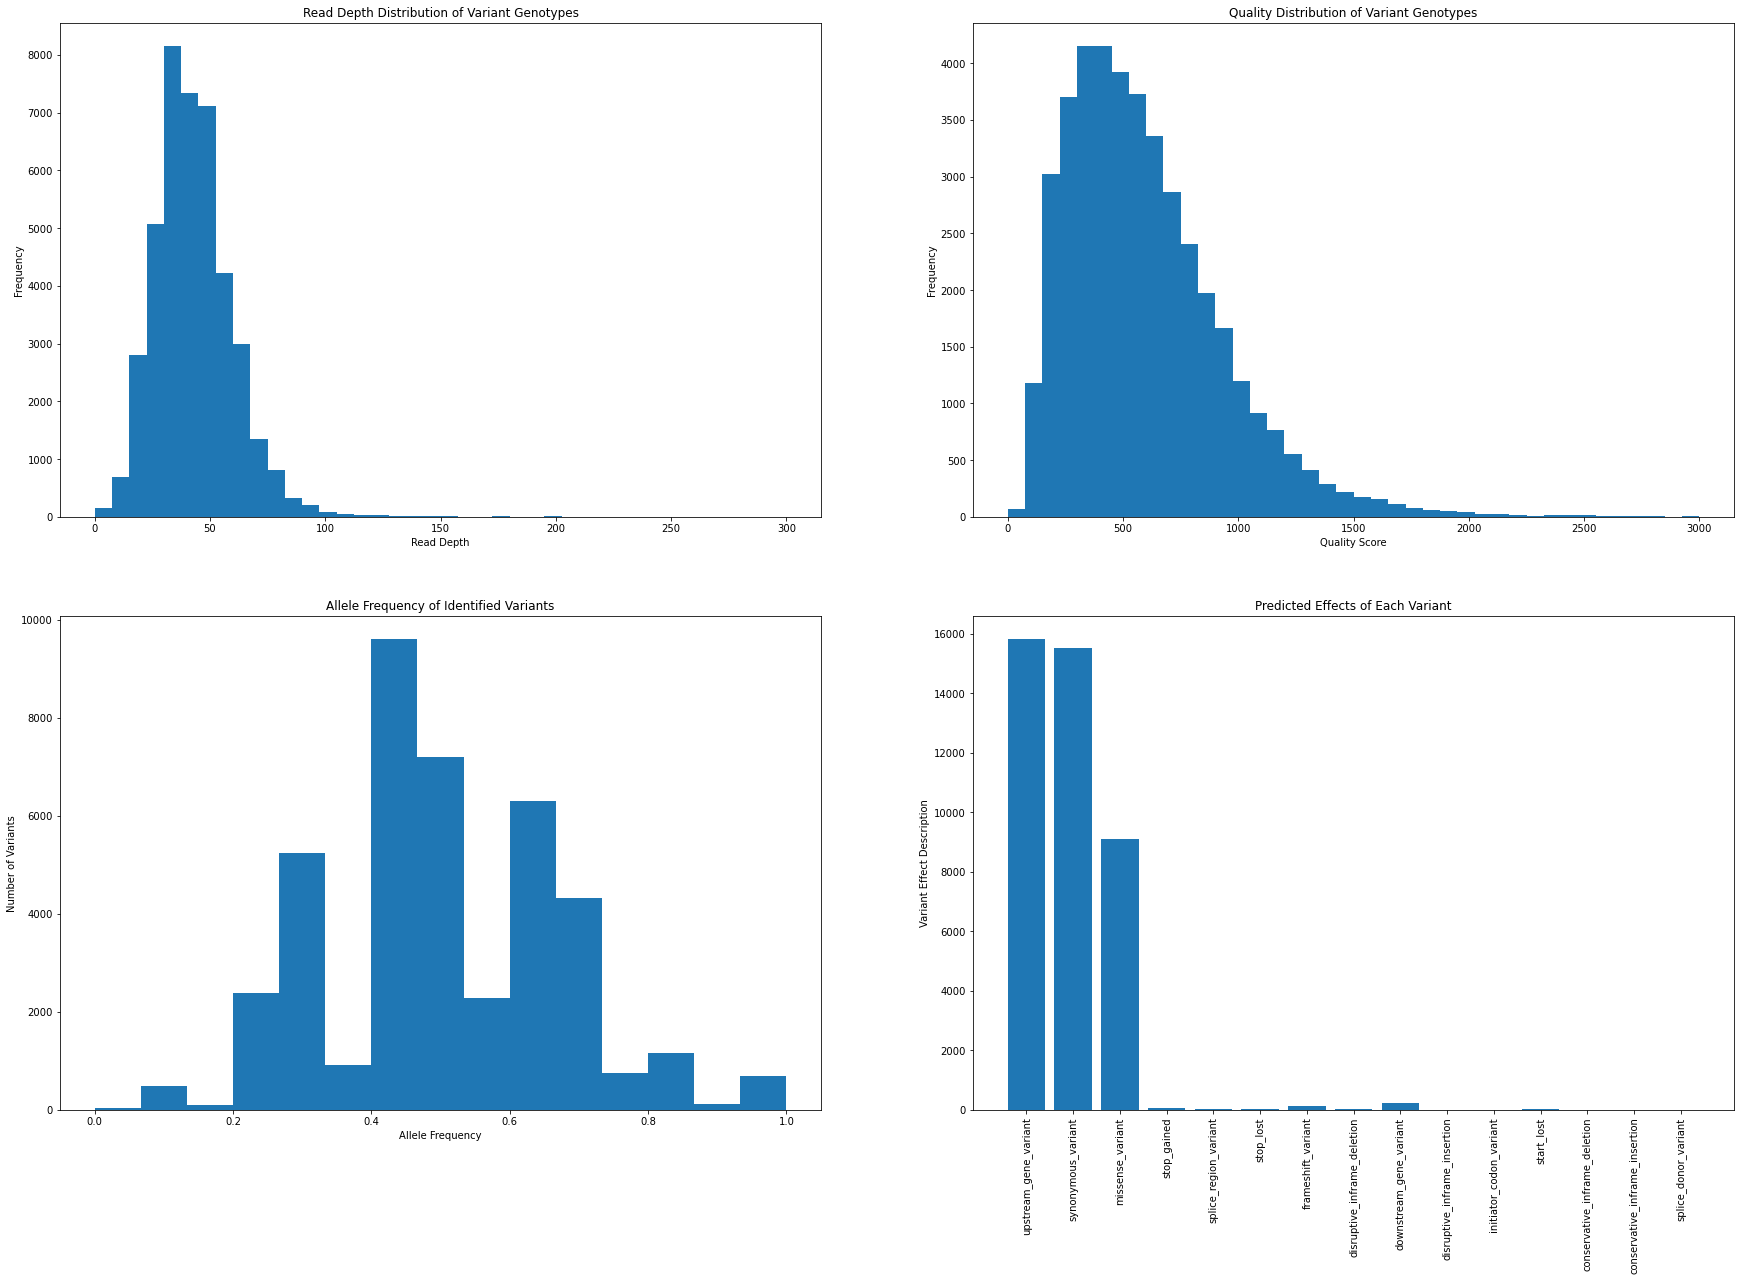

In [82]:
fig, axes = plt.subplots(2, 2, figsize = (30,20))
dp = axes[0,0]
dp.hist(Read_Depth, bins = 40, range = (0,300)) #Stays 0 for a long time after 150 can cut range to see data
dp.set_title("Read Depth Distribution of Variant Genotypes")
dp.set_xlabel("Read Depth")
dp.set_ylabel("Frequency")

#generates read depth histogram
gq = axes[0,1]
gq.hist(Quality_Distribution, bins = 40, range = (0,3000)) #each one has a GQ value keep entire range
gq.set_title("Quality Distribution of Variant Genotypes")
gq.set_xlabel("Quality Score")
gq.set_ylabel("Frequency")

#generates read depth histogram
af = axes[1,0]
af.hist(Allele_Freq, bins = 15, range = (0,1)) #allele frequency values are no greater than 1
af.set_title("Allele Frequency of Identified Variants")
af.set_xlabel("Allele Frequency")
af.set_ylabel("Number of Variants")

#Generates Histogram 
ef = axes[1,1]
ef.bar(effects.keys(),effects.values())
ef.set_title("Predicted Effects of Each Variant")
ef.set_ylabel("Variant Effect Description")
plt.xticks(rotation = 90)


plt.show()